In [1]:
# importing all necessary functions 
# importing functions 
import os 
import scipy.io as sio 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from tkinter import Tk
from tkinter.filedialog import askdirectory 
import pandas as pd
#import h5py
import math
matplotlib.rcParams["figure.dpi"] = 50

### import functions ###
#importing packages
import tifffile as tif
import cv2 as cv 
import seaborn as sns

from scipy.spatial import distance
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from scipy.signal import savgol_filter as sf
from scipy.signal import find_peaks
from scipy import stats
import skimage.exposure


In [2]:
#useful functions 
def readImages(imgPath):
    ''' 
    read image file and return array, dtype and the  shape 
    '''
    img = cv.imread(imgPath,0) # read image as grayscale
    try: 
        imgShape = img.shape
    except AttributeError:
        print("Initial attempt with opencv failed, will try again with tifffile package...")

    if img is None:
        img2 = tif.imread(imgPath)
        img = img2 
        imgShape = img2.shape
        
    ## create return obj 
    outList= [img,type(img),imgShape]
    return outList


def findCentroid(arr):
    'find centroid of array using weighted average'
    N = arr.shape[0]
    sum_x = np.sum(arr[:,1])
    sum_y = np.sum(arr[:,0])
    return int(sum_y/N),int(sum_x/N)

In [3]:
# load in images path  here 
path = askdirectory(title='Select matFiles folder in PWS Directory') # shows dialog box and return the path

objc[10699]: Class FIFinderSyncExtensionHost is implemented in both /System/Library/PrivateFrameworks/FinderKit.framework/Versions/A/FinderKit (0x7fff9ad2d3d8) and /System/Library/PrivateFrameworks/FileProvider.framework/OverrideBundles/FinderSyncCollaborationFileProviderOverride.bundle/Contents/MacOS/FinderSyncCollaborationFileProviderOverride (0x17ac8cf50). One of the two will be used. Which one is undefined.


In [4]:
dataArray = [file for file in os.listdir(path)]
print(dataArray)
# change to directory then load image of interest 
os.chdir(path)

['MAX_hct116_lb1b2_cell008.tif', '._MAX_hct116_lb1b2_cell008.tif', 'MAX_hct116_lb1b2_cell002.tif', '._MAX_hct116_lb1b2_cell002.tif', 'MAX_hct116_lb1b2_cell005.tif', '._MAX_hct116_lb1b2_cell005.tif', 'cell008_example_filtered_frame.tif', '._cell008_example_filtered_frame.tif', 'MAXRoI_hct116_lb1b2_cell002.tif', '._MAXRoI_hct116_lb1b2_cell002.tif', 'MAX_back_RoI_hct116_lb1b2_cell002.tif', '._MAX_back_RoI_hct116_lb1b2_cell002.tif', 'MAX_crop_hct116_lb1b2_cell006.tif', '._MAX_crop_hct116_lb1b2_cell006.tif', 'MAX_crop_hct116_lb1b2_cell007.tif', '._MAX_crop_hct116_lb1b2_cell007.tif', 'MAX_bacsub_crop_hct116_lb1b2_cell006.tif', '._MAX_bacsub_crop_hct116_lb1b2_cell006.tif', 'example_detection_cell7.tif', '._example_detection_cell7.tif', 'Results_cell2-7.csv', '._Results_cell2-7.csv', 'MAX_hct116_lb1b2_cell011-1.tif', '._MAX_hct116_lb1b2_cell011-1.tif', 'UNTREATED_bacsub_EXAMPLE_PIC.tif', '._UNTREATED_bacsub_EXAMPLE_PIC.tif', 'UNTREATED_EXAMPLE_PIC.tif', '._UNTREATED_EXAMPLE_PIC.tif', 'MAX_hct1

In [6]:
img = readImages(dataArray[-10])[0]
# threshold image 
th,imgt = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# smooth out the edge without dilation 
blur = cv.GaussianBlur(imgt,(0,0),sigmaX = 2, borderType = cv.BORDER_DEFAULT )
nucMask = skimage.exposure.rescale_intensity(blur, in_range=(120,255), out_range=(0,255))
nucMask = nucMask.astype(np.uint8)
# now get rid of blur but keep smoothness
finMask = np.zeros((nucMask.shape))
idxs = np.where(nucMask!=0)
finMask[idxs] = 1

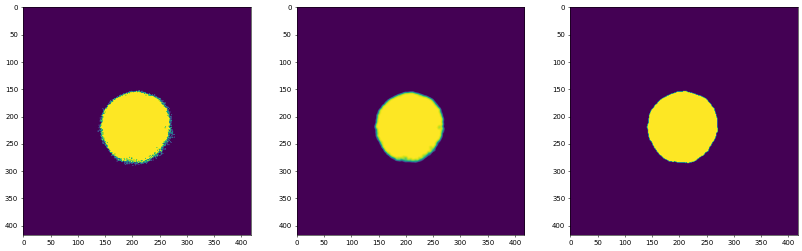

In [7]:
fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,3,1),plt.imshow(imgt)
fig.add_subplot(1,3,2),plt.imshow(nucMask)
fig.add_subplot(1,3,3),plt.imshow(finMask)
plt.show()

In [8]:
# set y,x point then find centroid and calculate distance 
foci = (140,116)
centroid = findCentroid(np.argwhere(finMask!=0))
print(centroid)

(219, 206)


In [17]:
# define booundary aand overlay with original image 
dilated =  cv.dilate(nucMask,None,np.ones((3,3),np.uint8),iterations=1)
fin = dilated-nucMask

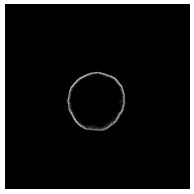

In [20]:
plt.imshow(fin,cmap='gray')
plt.axis('off')
plt.savefig(os.path.join(path,'test.tif'),transparent=True,bbox_inches='tight')
plt.show()